In [18]:
def print_test_results(results):
    total = sum(results.values())
    precision = results['TP']/(results['TP']+results['FP'])
    recall = results['TP']/(results['TP']+results['FN'])
    
    print(results, '\n')
    
    print("Accuracy score:")
    print(f"{(results['TP']+results['TN'])/total}\n")
    
    print("Precision score:")
    print(f"{precision}\n")
    
    print("Recall score:")
    print(f"{recall}\n")
    
    print("F1 score:")
    print(f"{2*precision*recall/(precision+recall)}\n")

In [1]:
sc.addPyFile("../Pattern_extraction/Pattern_Extractor.py")
sc.addPyFile("../Pattern_extraction/Additional_tools.py")


import time
from Pattern_Extractor import Pattern_Extractor as Extractor
import os


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [78]:
#parameters
support = 0.001
interval = 30 #time window
maxDelta = 3 #how many spatial deltas
th = 0.5 #distance (seems in km)
window_size = 3 #how many time deltas

neighborhood_type = 'indegree'
n_neighbors = 20
extraction_type = 'Full-Decrease' # Full-AlmostFull or Empty-AlmostEmpty or 'Full-Decrease' or 'Empty-Increase'
incr_dec_threshold = 1 # 0 for threshold > 0
wrap_states=True
state_change = False

In [79]:
status_path  = "datasets/SanFrancisco_status_train.csv" 
stations_path = "bike_sharing/station.csv"

ext = Extractor(interval, maxDelta, th, window_size, status_path, stations_path, spark, sc)

In [80]:
df = ext.extract_items(extraction_type=extraction_type, neighborhood_type=neighborhood_type,
                       n_neighbors=n_neighbors, incr_dec_threshold=incr_dec_threshold, 
                       wrap_states=wrap_states, state_change=state_change)

In [81]:
support = 0.001
prefix = ext.extract_frequent_items(df, support)

In [82]:
output_file = f"../../Results/Classification_patterns/{extraction_type}{'_wrapped' if wrap_states else ''}{'_stateChange' if state_change else ''}/{n_neighbors if neighborhood_type=='indegree' else 'Dist'}_{incr_dec_threshold}_{interval}_{int(th*1000)}_{support}({window_size}-{maxDelta}).txt"

if not os.path.exists(f"../../Results/Classification_patterns/{extraction_type}{'_wrapped' if wrap_states else ''}{'_stateChange' if state_change else ''}/"):
    os.makedirs(f"../../Results/Classification_patterns/{extraction_type}{'_wrapped' if wrap_states else ''}{'_stateChange' if state_change else ''}/")

ext.save_classification_patterns(prefix, output_file)

../../Results/Classification_patterns/Full-Decrease_wrapped/20_1_30_500_0.001(3-3).txt  saved successfully.


In [83]:
# next directories needs to be modified every time

#!hdfs dfs -mkdir ./Classification_patterns/Full-Decrease_wrapped/
!hdfs dfs -put "../../Results/Classification_patterns/Full-Decrease_wrapped/20_1_30_500_0.001(3-3).txt" ./Classification_patterns/Full-Decrease_wrapped/

In [84]:
!hdfs dfs -ls Classification_patterns/Full-Decrease_wrapped

Found 4 items
-rw-r-----   3 s287791 students    2155593 2022-04-13 08:50 Classification_patterns/Full-Decrease_wrapped/10_1_30_500_0.001(3-3).txt
-rw-r-----   3 s287791 students    3193040 2022-04-13 10:30 Classification_patterns/Full-Decrease_wrapped/20_1_30_500_0.001(3-3).txt
-rw-r-----   3 s287791 students    1010090 2022-04-13 10:03 Classification_patterns/Full-Decrease_wrapped/5_1_30_500_0.001(3-3).txt
-rw-r-----   3 s287791 students     296564 2022-04-13 09:45 Classification_patterns/Full-Decrease_wrapped/Dist_1_30_500_0.001(3-3).txt


In [85]:
status_path_test  = "datasets/SanFrancisco_status_test.csv"

test_ext = Extractor(interval, maxDelta, th, window_size, status_path_test, stations_path, spark, sc)
df_t = test_ext.extract_items(extraction_type=extraction_type, neighborhood_type=neighborhood_type,
                       n_neighbors=n_neighbors, incr_dec_threshold=incr_dec_threshold, 
                       wrap_states=wrap_states, state_change=state_change, for_test=True)

File:  ./Classification_patterns/Full-Decrease_wrapped/20_1_30_500_0.001(3-3).txt


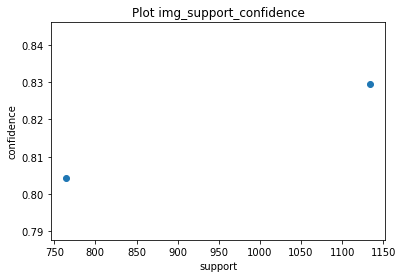

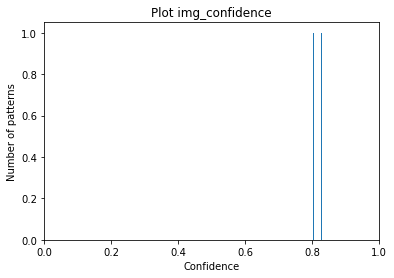

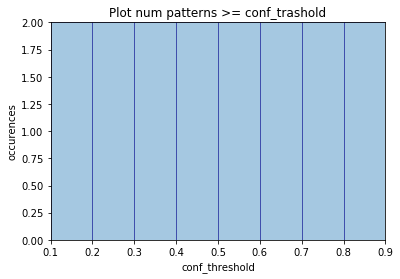

In [96]:
# remember to change patterns file
conf_threshold = 0.8
sup_threshold = 0
patterns_file = f"./Classification_patterns/{extraction_type}{'_wrapped' if wrap_states else ''}{'_stateChange' if state_change else ''}/{n_neighbors if neighborhood_type=='indegree' else 'Dist'}_{incr_dec_threshold}_{interval}_{int(th*1000)}_{support}({window_size}-{maxDelta}).txt"

print("File: ", patterns_file)

filtered_patterns = ext.filter_patterns_conf_sup(patterns_file, conf_threshold, sup_threshold, target='AlmostFull')
ext.print_patterns_stats(filtered_patterns)
rules = filtered_patterns.collect()

In [97]:
results = test_ext.test_rules(df_t, rules)

In [98]:
print_test_results(results)

{'TP': 9847, 'FN': 15870, 'FP': 18431, 'TN': 323782} 

Accuracy score:
0.9067730274780529

Precision score:
0.3482212320531862

Recall score:
0.3828984718279737

F1 score:
0.3647374756921937



# Experimental results

$$patterns_file = "./Classification_patterns/Full-Decrease_wrapped/5_1_30_500_0.001(3-3).txt"$$

$conf threshold = 0.5
sup threshold = 0$

Accuracy score:
0.37735305469034536

Precision score:
0.09996774092024927

Recall score:
0.9880628353682246

F1 score:
0.18156550319745632

$conf threshold = 0.7
sup threshold = 0$

Accuracy score:
0.47407359088512363

Precision score:
0.11541776306741604

Recall score:
0.9789641496228323

F1 score:
0.20649071583229447

$$patterns_file = "./Classification_patterns/Full-Decrease_wrapped/10_1_30_500_0.001(3-3).txt"$$

$conf threshold = 0.5
sup threshold = 0$

Accuracy score:
0.31530539859592477

Precision score:
0.0920907418761496

Recall score:
0.9928840844577517

F1 score:
0.16854848557858917

$conf threshold = 0.7
sup threshold = 0$

Accuracy score:
0.5300968393358502

Precision score:
0.12683698617633038

Recall score:
0.9725862270093713

F1 score:
0.22440840679182647

$$patterns_file = "./Classification_patterns/Full-Decrease_wrapped/20_1_30_500_0.001(3-3).txt"$$

$conf threshold = 0.5
sup threshold = 0$

Accuracy score:
0.2598700839833664

Precision score:
0.08602240792906282

Recall score:
0.9962670606991484

F1 score:
0.15837036945462638

$conf threshold = 0.7
sup threshold = 0$

Accuracy score:
0.35042535264860164

Precision score:
0.09647904644782897

Recall score:
0.9914453474355485

F1 score:
0.17584623024083423

$conf threshold = 0.8
sup threshold = 0$

Accuracy score:
0.9067730274780529

Precision score:
0.3482212320531862

Recall score:
0.3828984718279737

F1 score:
0.3647374756921937

$$patterns_file = "./Classification_patterns/Full-Decrease_wrapped/Dist_1_30_500_0.001(3-3).txt"$$

$conf threshold = 0.5
sup threshold = 0$

Accuracy score:
0.28953061723697443

Precision score:
0.08915671891560216

Recall score:
0.9944005910487226

F1 score:
0.16364154100637018

$conf threshold = 0.7
sup threshold = 0$

Accuracy score:
0.37067105155872043

Precision score:
0.09913685653745481

Recall score:
0.9896955321382743

F1 score:
0.18022113413559068

$$patterns_file = "./Classification_patterns/Full-Decrease_wrapped_stateChange/10_1_30_500_0.001(3-3).txt"$$
$conf threshold = 0.5
sup threshold = 0$

No rules survive

$$patterns_file = "./Classification_patterns/Full-Decrease_wrapped_stateChange_Dist/10_1_30_500_0.001(3-3).txt"$$
$conf threshold = 0.5
sup threshold = 0$

No rules survive